### Utils

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import os

#os.environ["HTTP_PROXY"] = "http://cache.ha.univ-nantes.fr:3128"
#os.environ["HTTPS_PROXY"] = "http://cache.ha.univ-nantes.fr:3128"

import osmnx as ox

import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

## Load Data

In [2]:
dataEstate = pd.read_csv("data/dataGouvReady[2016-2020].zip", compression='zip', index_col=0)
                        #dtype=dictTypes)

dataEstate = dataEstate.dropna(subset=['Code postal'])
dataEstate["Code postal"] = dataEstate["Code postal"].astype(int)

print(dataEstate.dtypes)
dataEstate.head()

Date mutation                  object
Nature mutation                object
Valeur fonciere               float64
No voie                       float64
B/T/Q                          object
Type de voie                   object
Code voie                      object
Voie                           object
Code postal                     int32
Commune                        object
Code departement                int64
Code commune                    int64
Prefixe de section            float64
Section                        object
No plan                         int64
No Volume                      object
1er lot                       float64
Surface Carrez du 1er lot      object
2eme lot                      float64
Surface Carrez du 2eme lot     object
3eme lot                      float64
Surface Carrez du 3eme lot     object
4eme lot                      float64
Surface Carrez du 4eme lot     object
5eme lot                      float64
Surface Carrez du 5eme lot     object
Nombre de lo

C:\Miniconda4\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (16,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,11/01/2016,Vente,80000.0,6.0,NaN,BD,4884,LELASSEUR,44000,NANTES,...,NaN,2,2.0,Appartement,NaN,32.0,1.0,NaN,NaN,NaN
1,11/01/2016,Vente,96000.0,37.0,NaN,BD,4464,JEAN INGRES,44100,NANTES,...,NaN,2,2.0,Appartement,NaN,57.0,3.0,NaN,NaN,NaN
2,13/01/2016,Vente,285000.0,4.0,B,IMP,8496,VIGNOLLE,44000,NANTES,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,533.0
3,05/01/2016,Vente en l'état futur d'achèvement,176000.0,61.0,NaN,BD,6596,PIERRE DE COUBERTIN,44100,NANTES,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/2016,Vente en l'état futur d'achèvement,176000.0,61.0,NaN,BD,6596,PIERRE DE COUBERTIN,44100,NANTES,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataGPS = pd.read_csv("data/dataGouvGPS.zip", compression='zip', index_col=0)

dataGPS.head()

,Commune,Voie,Code postal,lat,lng
0,NANTES,LELASSEUR,44000,47.231337,-1.569236
1,NANTES,JEAN INGRES,44100,47.222348,-1.596835
2,NANTES,LOUIS LUMIERE,44000,47.223805,-1.578266
3,NANTES,HONORE DE BALZAC,44100,47.202395,-1.581937
4,NANTES,COLOMBEL,44000,47.230710,-1.555199


In [5]:

dataGeoGPS = gpd.GeoDataFrame(dataGPS, geometry=gpd.points_from_xy(dataGPS.lng, dataGPS.lat))

dataGeoGPS.head()

,Commune,Voie,Code postal,lat,lng,geometry
0,NANTES,LELASSEUR,44000,47.231337,-1.569236,POINT (-1.56924 47.23134)
1,NANTES,JEAN INGRES,44100,47.222348,-1.596835,POINT (-1.59684 47.22235)
2,NANTES,LOUIS LUMIERE,44000,47.223805,-1.578266,POINT (-1.57827 47.22381)
3,NANTES,HONORE DE BALZAC,44100,47.202395,-1.581937,POINT (-1.58194 47.20239)
4,NANTES,COLOMBEL,44000,47.230710,-1.555199,POINT (-1.55520 47.23071)


## Set the Address for houses and appartments

In [6]:
dataEstateWithGPS = dataEstate.merge(dataGeoGPS, right_on=['Voie', 'Code postal', 'Commune'], left_on=['Voie', 'Code postal', 'Commune'])
dataEstateWithGPS = gpd.GeoDataFrame(dataEstateWithGPS, geometry=gpd.points_from_xy(dataEstateWithGPS.lng, dataEstateWithGPS.lat))

dataEstateWithGPS.head()

,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,...,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,lat,lng,geometry
0,11/01/2016,Vente,80000.0,6.0,NaN,BD,4884,LELASSEUR,44000,NANTES,...,Appartement,NaN,32.0,1.0,NaN,NaN,NaN,47.231337,-1.569236,POINT (-1.56924 47.23134)
1,03/02/2016,Vente,140000.0,19.0,NaN,BD,4884,LELASSEUR,44000,NANTES,...,Appartement,NaN,72.0,2.0,NaN,NaN,NaN,47.231337,-1.569236,POINT (-1.56924 47.23134)
2,03/02/2016,Vente,140000.0,19.0,NaN,BD,4884,LELASSEUR,44000,NANTES,...,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,47.231337,-1.569236,POINT (-1.56924 47.23134)
3,27/01/2016,Vente,215000.0,6.0,NaN,BD,4884,LELASSEUR,44000,NANTES,...,Appartement,NaN,73.0,3.0,NaN,NaN,NaN,47.231337,-1.569236,POINT (-1.56924 47.23134)
4,27/01/2016,Vente,215000.0,6.0,NaN,BD,4884,LELASSEUR,44000,NANTES,...,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,47.231337,-1.569236,POINT (-1.56924 47.23134)


## Display on map

On recherche tout d'abord la carte à afficher. Ici on recherche en donnant une bounding box.

Si la requête suivante ne fonctionne pas et que vous êtes sur le réseau filaire de l'école (sur un PC d'une salle machine) décommenter la commande de Proxy dans le premier bloque des imports précédents.

In [8]:
# haut à droite : Y = 47.301760, X = -1.399376
# haut à gauche : Y = 47.301760, X = -1.708622
# bas à gauche :  Y = 47.128771, X = -1.744068

# haut Y : 47.333266
# bas Y : 47.117529
# gauche X : -1.777510
# droite X : -1.390121

latNorth = 47.333266
latSouth = 47.117529
lngEst = -1.390121
lngWest = -1.777510

if(os.path.exists("data/GeoNantesBoundingBox.graphml")):
    GeoNantesBoundingBox = ox.load_graphml("data/GeoNantesBoundingBox.graphml")
else:
    GeoNantesBoundingBox = ox.graph_from_bbox(latNorth, latSouth, lngEst, lngWest, network_type='drive')



Ensuite, on affiche une figure en indiquant les points des ventes. Puis on affiche la carte récupérées précédemment.

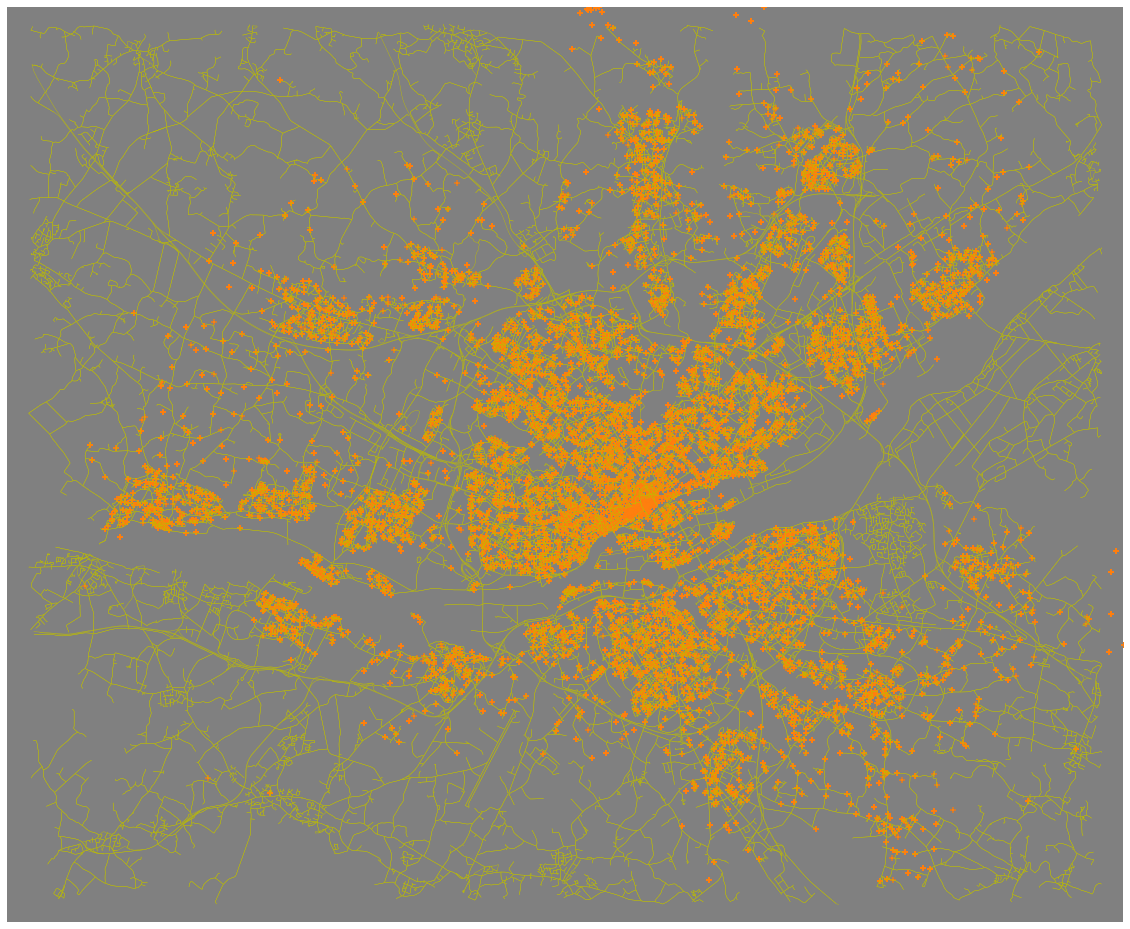

In [9]:
ax = dataEstateWithGPS.plot(marker='+', figsize=(20, 20))
ax.set_facecolor('grey')
dataEstateWithGPS.plot(ax=ax, marker='+')

fig, ax = ox.plot_graph(GeoNantesBoundingBox, ax=ax, figsize=(20, 20), node_size=0, edge_color="y", edge_linewidth=0.4, show=False)
